# Simple Linear Regression with Synthetic Data

In this first Colab, you'll explore linear regression with a simple database. 

## Import relevant modules

The following cell imports the packages that the program requires:

In [0]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds an empty model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass. 

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the headline to explore this code.

In [0]:
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1,input_shape=(1,)))
  model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = my_learning_rate),
                loss = "mean_squared_error",
                metrics = [tf.keras.metrics.RootMeanSquaredError()])
  return model

In [0]:
def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=None,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

In [0]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

In [0]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 533.0529 - root_mean_squared_error: 23.0879
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 521.0760 - root_mean_squared_error: 22.8271
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 512.5187 - root_mean_squared_error: 22.6389
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 505.4312 - root_mean_squared_error: 22.4818
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 499.1964 - root_mean_squared_error: 22.3427
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 493.5285 - root_mean_squared_error: 22.2155
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 488.2681 - root_mean_squared_error: 22.0968
Epoch 8/10
1/1 [==============================] - 0s 2ms/step - loss: 483.3165 - root_mean_squared_error: 21.9845
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 478.6076 - root_me

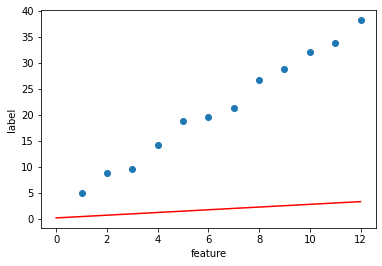

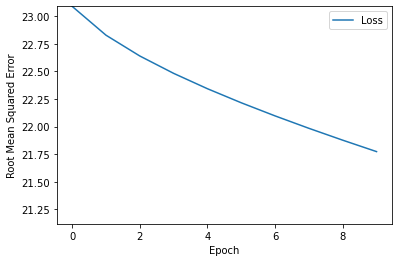

In [19]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 122.1718 - root_mean_squared_error: 11.0531
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 116.4927 - root_mean_squared_error: 10.7932
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 112.5039 - root_mean_squared_error: 10.6068
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 109.2407 - root_mean_squared_error: 10.4518
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 106.3998 - root_mean_squared_error: 10.3150
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 103.8409 - root_mean_squared_error: 10.1902
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 101.4863 - root_mean_squared_error: 10.0740
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 99.2876 - root_mean_squared_error: 9.9643
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 97.2126 - r

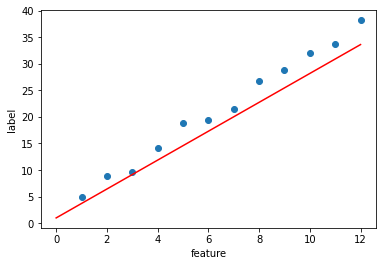

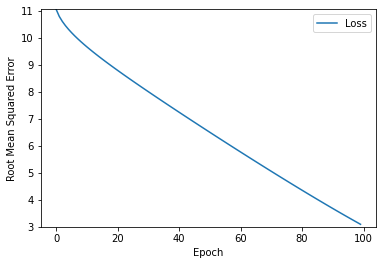

In [20]:
learning_rate=0.01
epochs=100
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/420
1/1 [==============================] - 0s 2ms/step - loss: 321.7606 - root_mean_squared_error: 17.9377
Epoch 2/420
1/1 [==============================] - 0s 2ms/step - loss: 312.4749 - root_mean_squared_error: 17.6770
Epoch 3/420
1/1 [==============================] - 0s 2ms/step - loss: 305.8698 - root_mean_squared_error: 17.4891
Epoch 4/420
1/1 [==============================] - 0s 1ms/step - loss: 300.4168 - root_mean_squared_error: 17.3325
Epoch 5/420
1/1 [==============================] - 0s 1ms/step - loss: 295.6327 - root_mean_squared_error: 17.1940
Epoch 6/420
1/1 [==============================] - 0s 2ms/step - loss: 291.2939 - root_mean_squared_error: 17.0673
Epoch 7/420
1/1 [==============================] - 0s 2ms/step - loss: 287.2758 - root_mean_squared_error: 16.9492
Epoch 8/420
1/1 [==============================] - 0s 2ms/step - loss: 283.5013 - root_mean_squared_error: 16.8375
Epoch 9/420
1/1 [==============================] - 0s 1ms/step - loss: 279.9188 

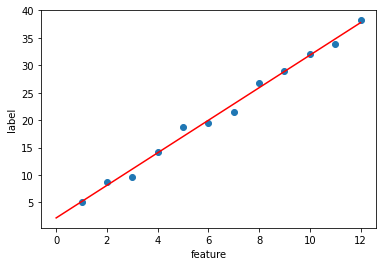

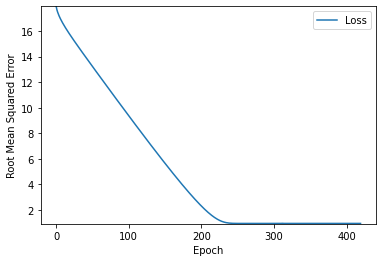

In [21]:
learning_rate=0.01
epochs=420
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 799.8911 - root_mean_squared_error: 28.2823
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 6669893.5000 - root_mean_squared_error: 2582.6138
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 791.9570 - root_mean_squared_error: 28.1417
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 4.5893 - root_mean_squared_error: 2.1423
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 1.2296 - root_mean_squared_error: 1.1089
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 1.1614 - root_mean_squared_error: 1.0777
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 1.1415 - root_mean_squared_error: 1.0684
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 1.1234 - root_mean_squared_error: 1.0599
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 1.1057 - root_mean

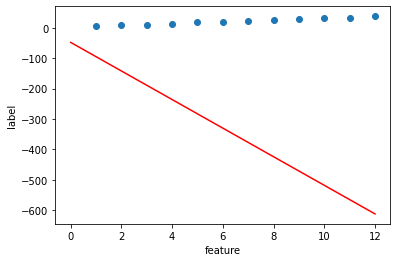

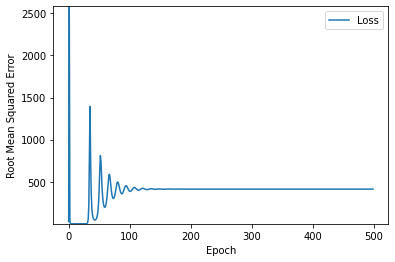

In [22]:
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/45
1/1 [==============================] - 0s 2ms/step - loss: 240.9837 - root_mean_squared_error: 15.5236
Epoch 2/45
1/1 [==============================] - 0s 1ms/step - loss: 166.8905 - root_mean_squared_error: 12.9186
Epoch 3/45
1/1 [==============================] - 0s 1ms/step - loss: 125.5078 - root_mean_squared_error: 11.2030
Epoch 4/45
1/1 [==============================] - 0s 1ms/step - loss: 97.2580 - root_mean_squared_error: 9.8619
Epoch 5/45
1/1 [==============================] - 0s 1ms/step - loss: 76.4175 - root_mean_squared_error: 8.7417
Epoch 6/45
1/1 [==============================] - 0s 1ms/step - loss: 60.4243 - root_mean_squared_error: 7.7733
Epoch 7/45
1/1 [==============================] - 0s 1ms/step - loss: 47.8761 - root_mean_squared_error: 6.9193
Epoch 8/45
1/1 [==============================] - 0s 1ms/step - loss: 37.9065 - root_mean_squared_error: 6.1568
Epoch 9/45
1/1 [==============================] - 0s 2ms/step - loss: 29.9340 - root_mean_squared_

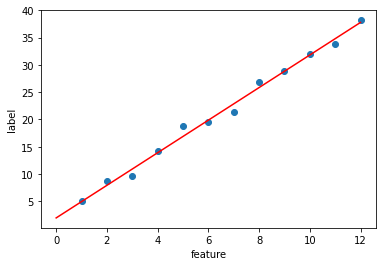

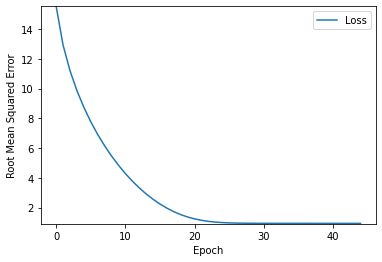

In [25]:
# Set the learning rate and number of epochs
learning_rate= 0.1 # Replace ? with a floating-point number
epochs= 45  # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 1029.6442 - root_mean_squared_error: 32.0881
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 947.6321 - root_mean_squared_error: 30.7836
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 891.3926 - root_mean_squared_error: 29.8562
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 846.1889 - root_mean_squared_error: 29.0893
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 807.4219 - root_mean_squared_error: 28.4152
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 772.9761 - root_mean_squared_error: 27.8024
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 741.6796 - root_mean_squared_error: 27.2338
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 712.8069 - root_mean_squared_error: 26.6984
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 685.8740

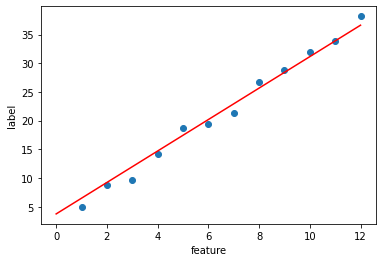

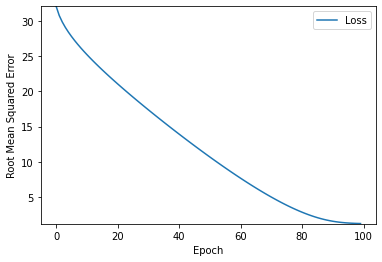

In [26]:
learning_rate=0.05
epochs=100
my_batch_size=124  # Replace ? with an integer.

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero. 
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the training loss too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory. 

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.